# Assignment Chapter 3 - COMPUTER VISION [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu mereplikasi algoritma *image enhancement* yang umumnya digunakan oleh produsen smartphone.
<br>`PERINGATAN` **DILARANG MENGUBAH** kode yang ada di dalam *user-defined function (UDFs)*.

### Deskripsi
Per bulan Juli 2023, Apple dan Samsung memimpin industri ponsel pintar (smartphone) di seluruh dunia, dengan angka gabungan 52,61% dari total pangsa pasar (market share) [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). Sebagai fitur utama yang wajib hadir pada smartphone masa kini, Apple dan Samsung berlomba-lomba menciptakan teknologi kamera agar Anda bisa mengabadikan foto terbaik meski dalam kondisi minim cahaya.
- Pada bulan September 2019, Apple memperkenalkan teknologi **Deep Fusion** (melalui seri iPhone 11) untuk mengatasi tantangan tersebut. Peningkatannya, yang diberi nama **Photonic Engine**, diperkenalkan pada September 2022 melalui seri iPhone 14 terbaru [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- Sementara itu, pada bulan Februari 2023, Samsung memperkenalkan teknologi **Adaptive Tetra-squared Pixel Sensor** dengan seri Samsung S23 terbarunya sebagai solusi lain untuk masalah serupa, menjanjikan hasil foto terang yang luar biasa dari gambar bernuansa gelap [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

Kedua teknologi ini bekerja dengan menggabungkan beberapa piksel yang berdekatan menjadi satu piksel, menggunakan operasi **Max Pooling**. Dalam hal ini, tugas Anda adalah mereplikasi konsep tersebut (mencerahkan foto dengan warna gelap), lalu membandingkan hasilnya dengan pendekatan lain, yaitu **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

### Import libraries

In [ ]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [ ]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [ ]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
**JANGAN LUPA** untuk upload file "photo1.jpeg" dan "lena.png" ke Google Colab.

In [ ]:
img = imread("photo1.jpeg")

In [ ]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

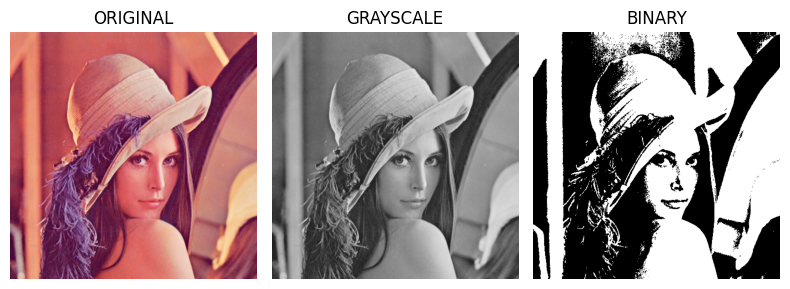

In [ ]:
# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Ubah kanal warna dari BGR ke RGB dengan cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # TODO: Ubah kanal warna dari BGR ke grayscale dengan cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY) # TODO: Ubah kanal warna dari grayscale ke binary dengan cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

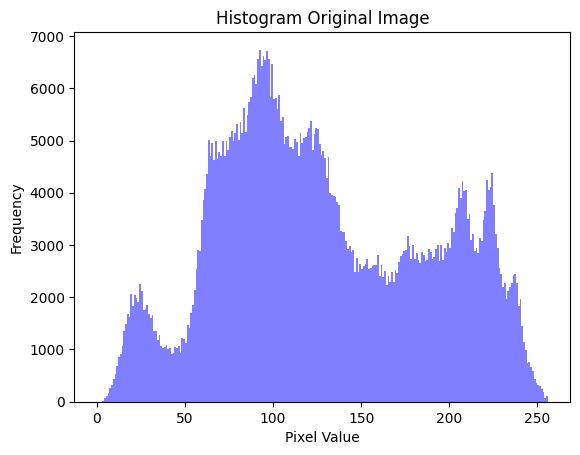

In [ ]:
# TODO: Plot histogram dari gambar asli
plt.hist(img_lena.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5)
plt.title("Histogram Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

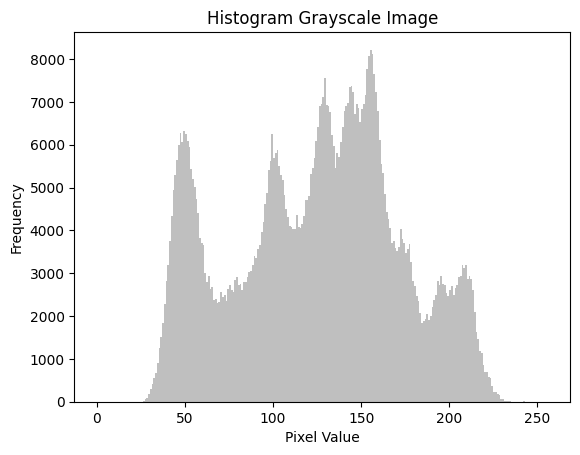

In [ ]:
# TODO: Plot histogram dari gambar grayscale
plt.hist(img_grayscaled.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.5)
plt.title("Histogram Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### Max Pooling (using Scikit-image)

In [ ]:
BLOCK_SIZE = (4, 4, 1)

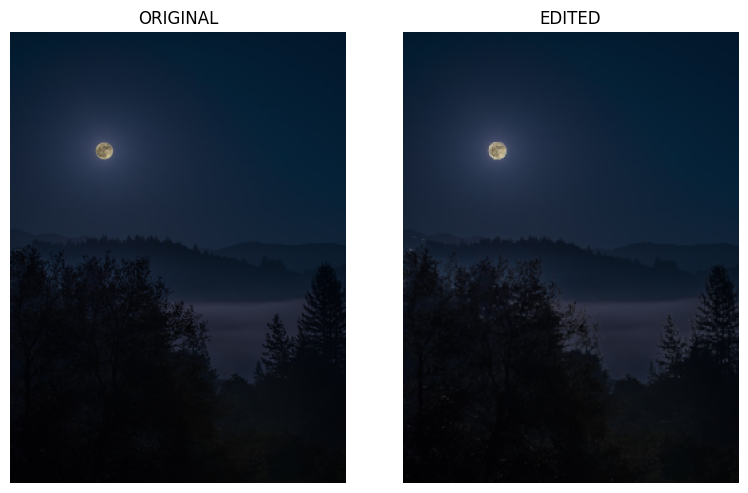

In [ ]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-11-c192e6f61ca2>:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


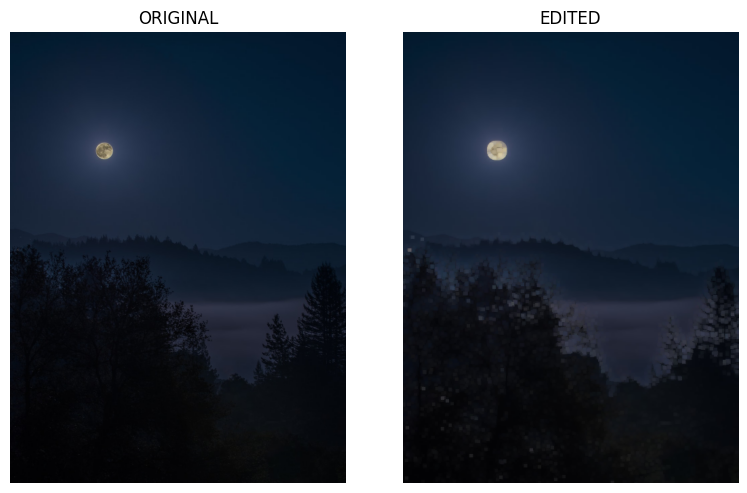

In [ ]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# PERTANYAAN
# TODO: Apa keunggulan operasi Max Pooling dari PyTorch dibandingkan yang dari Scikit-image?

Keunggulan Max Pooling di PyTorch dibandingkan dengan Scikit-image terutama terletak pada kecepatan dan optimalisasi, terutama saat bekerja dengan data berukuran besar. PyTorch mendukung eksekusi di GPU, sehingga Max Pooling bisa dilakukan lebih cepat dan lebih efisien, yang sangat membantu jika kita menangani gambar resolusi tinggi atau dataset dalam jumlah besar. PyTorch juga dapat memproses gambar dalam bentuk batch (batch processing), yang berarti kita bisa memproses banyak gambar sekaligus, membuatnya jauh lebih efisien dalam konteks deep learning, di mana sering kali diperlukan pemrosesan data secara masif dan berulang.

Selain itu, Max Pooling pada PyTorch mudah diintegrasikan langsung dalam model deep learning. Karena PyTorch merupakan framework untuk deep learning, kita bisa memasukkan Max Pooling sebagai bagian dari pipeline atau arsitektur neural network tanpa perlu melakukan penyesuaian tambahan. Hal ini membantu menjaga alur kerja tetap konsisten dan lebih efisien. PyTorch juga mendukung pelacakan gradien secara otomatis (automatic differentiation) dengan autograd, yang sangat penting untuk proses pelatihan model dan tidak tersedia di Scikit-image, sehingga menjadikannya pilihan yang lebih baik untuk aplikasi deep learning kompleks dan modern. Terakhir, PyTorch juga memiliki fleksibilitas lebih dalam pengaturan parameter seperti ukuran kernel dan stride, yang mempermudah kita untuk mengatur pooling sesuai kebutuhan spesifik aplikasi atau model yang sedang dikembangkan.

### Min Pooling and Average Pooling

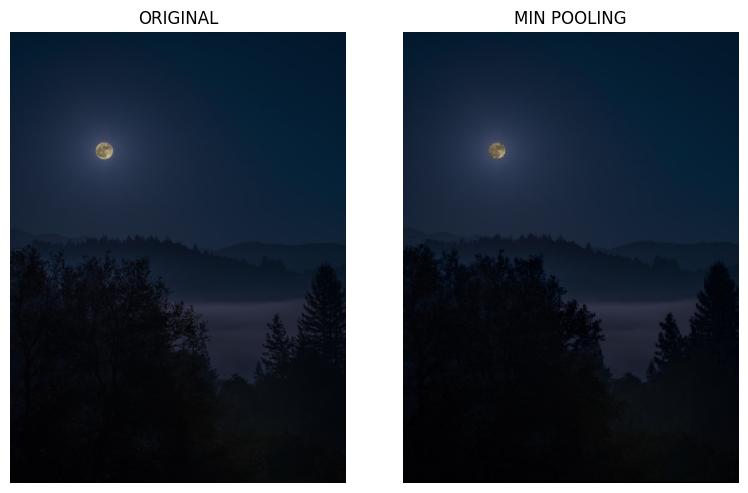

In [ ]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min) # TODO: Panggil ulang block_reduce(), tetapi dengan func=np.min
plot(imgs=[img, img_edited_min], titles=["ORIGINAL", "MIN POOLING"])

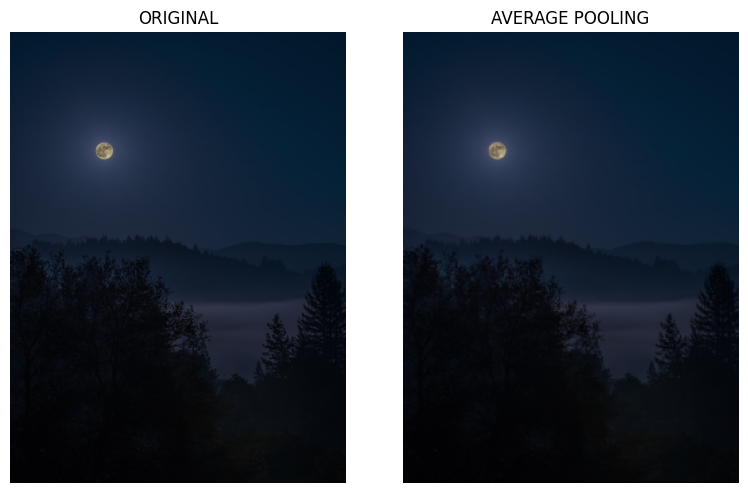

In [ ]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean).astype(int) # TODO: Panggil ulang block_reduce().astype(int), tetapi dengan func=np.mean
plot(imgs=[img, img_edited_avg], titles=["ORIGINAL", "AVERAGE POOLING"])

In [ ]:
# [ PERTANYAAN ]
# TODO: Apa perbedaan antara Min Pooling dan Average Pooling?
# Hint: Apabila perbedaannya tidak terlihat, coba dengan gambar lain atau ubah angka di BLOCK_SIZE.

Min Pooling dan Average Pooling memiliki perbedaan utama pada cara mereka memproses piksel dalam blok tertentu. Dimana Min Pooling mengambil nilai piksel terendah di setiap blok, sehingga hasilnya cenderung lebih gelap dan mempertahankan area dengan nilai intensitas terendah pada gambar. Hal ini bisa berguna untuk mempertahankan detail pada area gambar yang lebih gelap atau kontras rendah. Min Pooling efektif dalam menonjolkan struktur gambar yang cenderung gelap tanpa mencerahkan area terang secara berlebihan.

Di sisi lain, Average Pooling menghitung rata-rata nilai piksel dalam setiap blok, yang menghasilkan gambar yang cenderung lebih lembut dan menghilangkan sebagian detail, karena rata-rata mengaburkan perbedaan ekstrem antar piksel. Average Pooling biasanya digunakan untuk mengurangi ukuran gambar secara halus sambil mempertahankan informasi menyeluruh, berbeda dengan Min Pooling yang lebih spesifik mempertahankan nilai terendah. Efek Average Pooling lebih cocok untuk mengurangi noise sambil menjaga elemen-elemen utama tetap terlihat, menjadikannya ideal untuk aplikasi yang memerlukan gambar ringkas namun tetap informatif.

### CLAHE
Sekarang, bayangkan Anda memiliki pendekatan baru untuk menyaingi Photonic Engine dari Apple and Adaptive Tetra-squared Pixel dari Samsung dengan menggunakan **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. Bagaimana hasilnya?

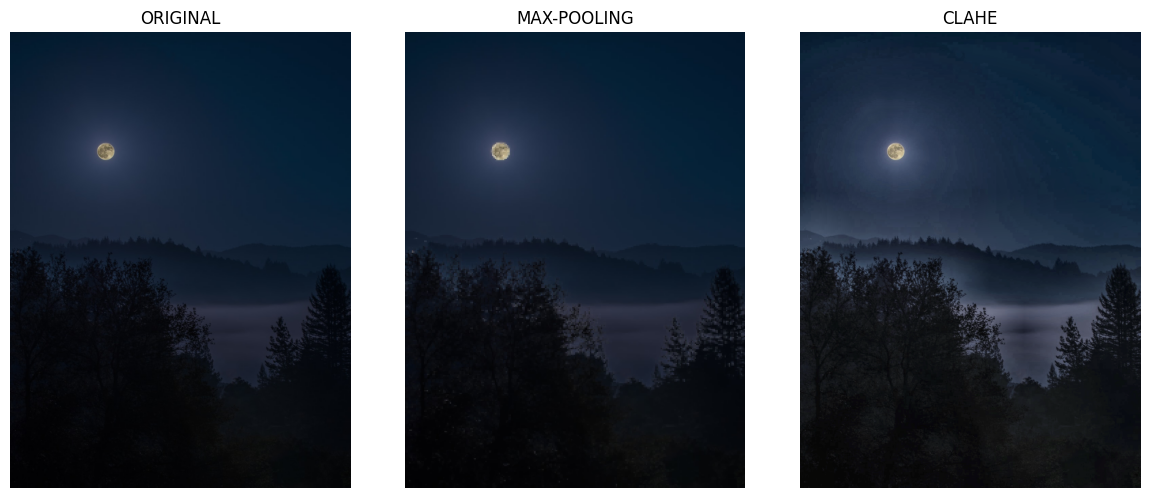

In [ ]:
img_clahe = apply_clahe_rgb(img) # TODO: Panggil fungsi apply_clahe_rgb() dan isi parameter img="photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# [ PERTANYAAN ]
# TODO: Apa keunggulan menggunakan CLAHE (daripada Max Pooling) untuk mencerahkan gambar bernuansa gelap?

Keunggulan menggunakan CLAHE dibandingkan Max Pooling untuk mencerahkan gambar bernuansa gelap terletak pada kemampuannya mempertahankan detail dan meningkatkan kontras secara lokal. CLAHE (Contrast Limited Adaptive Histogram Equalization) bekerja dengan menyesuaikan kontras pada setiap bagian kecil gambar, sehingga area gelap dapat menjadi lebih terang tanpa menyebabkan area terang menjadi terlalu terang. Hal tersebut membuat CLAHE efektif untuk meningkatkan visibilitas detail dalam bayangan atau area dengan pencahayaan rendah tanpa kehilangan informasi/hal lain pada area lainnya. CLAHE juga memungkinkan kontrol terhadap tingkat clipping, sehingga distribusi intensitas tetap seimbang dan alami tanpa area tertentu yang menjadi terlalu terang atau overexposed.

Sementara itu, Max Pooling, yang hanya memilih nilai maksimum dari setiap blok piksel, cenderung menghilangkan detail karena tidak mempertimbangkan variasi intensitas dalam blok tersebut. Akibatnya, Max Pooling dapat membuat gambar menjadi lebih terang, tetapi dengan risiko hilangnya beberapa detail penting, karena hanya nilai tertinggi yang digunakan. Hal ini menjadikan CLAHE lebih unggul dalam aplikasi yang membutuhkan kejelasan visual menyeluruh dan mempertahankan kontras lokal, seperti pemrosesan gambar medis atau pengawasan video pada area gelap.

### Save your edited image

In [ ]:
FILE_NAME = "photo1_image_clahe.png" # TODO: Berikan nama file` ke gambar yang sudah disempurnakan dengan CLAHE, diakhiri dengan ekstensi .png
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ ] Ubah kanal warna dari BGR ke RGB dengan cv2.COLOR_BGR2RGB
- [ ] Ubah kanal warna dari BGR ke grayscale dengan cv2.COLOR_BGR2GRAY
- [ ] Ubah kanal warna dari grayscale ke binary dengan cv2.THRESH_BINARY
- [ ] Plot histogram dari gambar asli
- [ ] Plot histogram dari gambar grayscale
- [ ] PERTANYAAN: Apa keunggulan operasi Max Pooling dari PyTorch dibandingkan yang dari Scikit-image?
- [ ] Panggil ulang block_reduce(), tetapi dengan func=np.min
- [ ] Panggil ulang block_reduce().astype(int), tetapi dengan func=np.mean
- [ ] PERTANYAAN: Apa perbedaan antara Min Pooling dan Average Pooling?
- [ ] Panggil fungsi apply_clahe_rgb() dan isi parameter img="photo1.jpeg"
- [ ] PERTANYAAN: Apa keunggulan menggunakan CLAHE (daripada Max Pooling) untuk mencerahkan gambar bernuansa gelap?
- [ ] Berikan nama file` ke gambar yang sudah disempurnakan dengan CLAHE, diakhiri dengan ekstensi .png

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2024 Startup Campus, Indonesia
* Prepared by **Nicholas Dominic, M.Kom.** [(profile)](https://linkedin.com/in/nicholas-dominic)
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.